In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None


# LA GRAN PANDEMIA

## ABSTRACT

Durante decadas y hasta siglos la humanidad ha estado luchando contra enfermedades infecciones capaces de llegar a ser pandemias o epidemias. Miles tratan de entender como es su funcionamiento y como se comportan en una poblacion. El desafio para la lucha contra estas enfermedades es saber de ante mano el comportamiento que va a tener la misma en la poblacion, su ciclo de vida, su capacidad de contagio, su capacidad de propagacion, su capacidad de mutacion, etc. Tambien es importante saber como se comporta la poblacion ante la enfermedad, como se comportan los individuos, como se comportan los grupos, como se comportan las familias, etc. 

Otro de los objetivos es poder saber con antelacion su capacidad de producir la muerte en los individuos infectados. Esto es particularmente importante para mejorar la eficiencia en la medidas que se puede tomar para combatir la enfermedad. 

La pandemia de COVID-19 fue la primer gran pandemia donde pudimos recolectar una gran cantidad de informacion. Es la primera vez en la historia de la humanidad donde se pudo rastrear y hacer seguimiento al curso de la enfermedad en millones de personas alrededor del mundo. Esta gran cantidad de datos nos permiten analizar y descubrir como se comportan las enfermedades cuando se propagan en una poblacion. 
Con esta gran cantidad de datos hoy podes predecir con mayor exactitud el comportamiento de la enfermedad. Intentaremos en este trabajo poder empezar a comprender uno de los aspectos mas criticos que es su mortalidad. 

## HIPOTESIS

El dataset elegido fue creado por el estado de Mexico, el cual contiene informacion de pacientes que fueron diagnosticados con COVID-19. El dataset contiene 21 columnas y 1,048,576 filas. Las columnas son las siguientes:

#### contenido del data set COVID

The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

- sex: 1 for female and 2 for male.
- age: of the patient.
- classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
- degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- pneumonia: whether the patient already have air sacs inflammation or not.
- pregnancy: whether the patient is pregnant or not.
- diabetes: whether the patient has diabetes or not.
- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- asthma: whether the patient has asthma or not.
- inmsupr: whether the patient is immunosuppressed or not.
- hypertension: whether the patient has hypertension or not.
- cardiovascular: whether the patient has heart or blood vessels related disease.
- renal chronic: whether the patient has chronic renal disease or not.
- other disease: whether the patient has other disease or not.
- obesity: whether the patient is obese or not.
- tobacco: whether the patient is a tobacco user.
- usmr: Indicates whether the patient treated medical units of the first, second or third level.
- medical unit: type of institution of the National Health System that provided the care.
- intubed: whether the patient was connected to the ventilator.
- icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
- date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

Mediante la utilizacion de los distintos datos que nos presenta el dataset, se puede realizar una serie de hipotesis que nos permitiran analizar el comportamiento de los datos y asi poder realizar una prediccion de los mismos. Se tratara de encontrar mediante regresion LINEAL la relacion entre las diferentes enfermedades preexsitentes y los distintos grados de avance de la enfermedad, desde lo mas leve a los mas grave y finalmente la muerte. Tambien se analizara la relacion entre el sexo y la edad de los pacientes, asi como la relacion entre el tipo de paciente y el tipo de unidad medica en la que fue atendido. Esto ayudara a poder adaptar los tratamientos y cuidados de los pacientes de acuerdo a las necesidades de cada uno de ellos.

#### Preguntas a responder:

- ¿Cual es la relacion entre las diferentes enfermedades preexsitentes y los distintos grados de avance de la enfermedad?
- ¿Cual es la relacion entre el sexo y la edad de los pacientes?
- ¿Cual es la relacion entre el tipo de paciente y el tipo de unidad medica en la que fue atendido?


In [3]:
#dataset normalizado y limpio

df_covid = pd.read_csv('./data/Covid_clean_total.csv')

C:\Users\ismael\AppData\Local\Temp\ipykernel_46328\129769781.py:3: DtypeWarning: Columns (4,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_covid = pd.read_csv('./data/Covid_clean_total.csv')


In [37]:
df_covid.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,fallecidos,mes,mes_nombre
0,2,1,1,1,2020-05-03,NaN,1.0,65.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,NaN,1,5.0,May
1,2,1,0,1,2020-06-03,NaN,1.0,72.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5,NaN,1,6.0,June
2,2,1,0,0,2020-06-09,1.0,0.0,55.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,1,6.0,June
3,2,1,1,1,2020-06-12,NaN,0.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,NaN,1,6.0,June
4,2,1,0,1,2020-06-21,NaN,0.0,68.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,NaN,1,6.0,June


In [38]:
#imprimir unicos de cada columna excepto fecha

for col in df_covid.columns:
    if col != 'DATE_DIED':
        print(col, df_covid[col].unique())




USMER [2 1]
MEDICAL_UNIT [ 1  0  3  4  5  6  7  8  9 10 11 12 13]
SEX [1 0]
PATIENT_TYPE [1 0]
INTUBED [nan  1.  0.]
PNEUMONIA [ 1.  0. nan]
AGE [ 65.  72.  55.  53.  68.  40.  64.  37.  25.  38.  24.  30.  48.  23.
  80.  61.  54.  59.  45.  26.  32.  49.  39.  27.  57.  20.  56.  47.
  50.  46.  43.  28.  33.  16.  62.  58.  36.  44.  66.  52.  51.  35.
  19.  90.  34.  22.  29.  14.  31.  42.  15.   1.   0.  17.  41.  10.
  12.  13.   4.   7.   6.   8.  60.   5.  63.  75.  81.  67.  18.  70.
  88.  85.  92.  73.  74.  78.  76.  82.  77.  86.  71.  95.  87.  83.
  84.  79.  69.  89.   3.  nan  93. 100.  91.  21. 103.  11.   9.  94.
  96. 101. 107. 102. 109. 119. 116. 105. 104. 111. 114. 120. 106. 108.
 110. 118. 117. 121. 115. 113.]
PREGNANT [ 0. nan  1.]
DIABETES [ 0.  1. nan]
COPD [ 0.  1. nan]
ASTHMA [ 0.  1. nan]
INMSUPR [ 0.  1. nan]
HIPERTENSION [ 1.  0. nan]
OTHER_DISEASE [ 0.  1. nan]
CARDIOVASCULAR [ 0.  1. nan]
OBESITY [ 0.  1. nan]
RENAL_CHRONIC [ 0.  1. nan]
TOBACCO [ 0. 

In [39]:
df_covid.shape

(1048575, 24)

In [40]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   USMER                 1048575 non-null  int64  
 1   MEDICAL_UNIT          1048575 non-null  int64  
 2   SEX                   1048575 non-null  int64  
 3   PATIENT_TYPE          1048575 non-null  int64  
 4   DATE_DIED             76942 non-null    object 
 5   INTUBED               192706 non-null   float64
 6   PNEUMONIA             1032572 non-null  float64
 7   AGE                   1048230 non-null  float64
 8   PREGNANT              521310 non-null   float64
 9   DIABETES              1045237 non-null  float64
 10  COPD                  1045572 non-null  float64
 11  ASTHMA                1045596 non-null  float64
 12  INMSUPR               1045171 non-null  float64
 13  HIPERTENSION          1045471 non-null  float64
 14  OTHER_DISEASE         1043530 non-

El dataset cuenta con las enfermedades y otros factores previos al contagio del COVID, así como el tipo de atención médica que recibió el paciente, si fue hospitalizado o no, si fue intubado o no, si falleció o no, y la fecha de fallecimiento. Con estos datos se puede analizar la relación entre las enfermedades previas y el resultado del COVID, así como la relación entre el tipo de atención médica y el resultado del COVID. Se intentara predecir si el paciente falleció o no, y si fue intubado o no, con base en las enfermedades previas y el tipo de atención médica que recibió.

## OBJETIVOS

El objetivo es poder comprender el comportamiento de la enfermedad para permitir la aplicacion de distintos tratamientos y la aplicacion de sistemas de triage para poder atender a los pacientes de acuerdo a sus necesidades. Reduciendo tiempos de espera, tiempos de tratamiento y tiempos de recuperacion. Esto se va a intentar mediante la prediccion de la mortalidad de los pacientes. Lo que va a permitir hacer mas eficiente y efectivo el uso de los recursos disponibles.

#### Graficas / EDA

 Vamos a empezar a analizar las distintas variables para poder tener una aproximacion de como se comportan los datos y poder hacer un analisis mas profundo mediante la hipotesis de que enfermedades previas al COVID pueden influir en el resultado del desarrollo de la enfermedad.

### fallecidos por sexo

En la siguiente grafica se puede observar que el numero de fallecidos es mayor en el sexo masculino, esto puede deberse a que los hombres son mas propensos a tener enfermedades preexistentes que las mujeres, como diabetes, hipertension, etc.

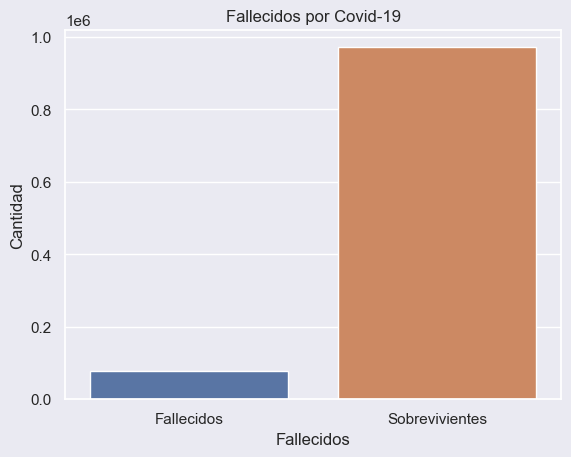

In [41]:
# grafico de fallecidos
df_covid['fallecidos'] = df_covid['fallecidos'].replace({1: 'Fallecidos', 0: 'Sobrevivientes'})
sns.countplot(x='fallecidos', data=df_covid)
plt.title('Fallecidos por Covid-19')
plt.xlabel('Fallecidos')
plt.ylabel('Cantidad')

# cambio dato fallacidos por fallecidos, sobrevivientes

df_covid['fallecidos'] = df_covid['fallecidos'].replace({1: 'Fallecidos', 0: 'Sobrevivientes'})

plt.show()


In [42]:
df_covid = pd.read_csv('./Covid_clean_total.csv')

C:\Users\ismael\AppData\Local\Temp\ipykernel_36724\1920695330.py:1: DtypeWarning: Columns (4,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_covid = pd.read_csv('./Covid_clean_total.csv')


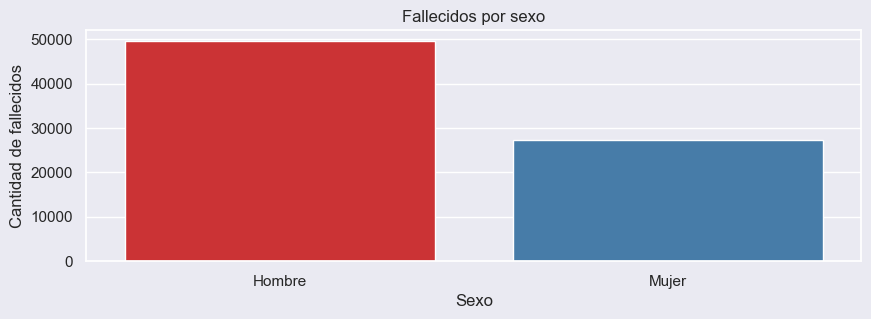

In [43]:
sns.set(rc={'axes.facecolor':'#EAEAF2', 'figure.facecolor':'#EAEAF2'})

fig, ax = plt.subplots(figsize=(10, 3))
bar = sns.countplot(x='SEX', data=df_covid[df_covid['fallecidos'] == 1], palette='Set1')
bar.set_xticklabels(['Hombre', 'Mujer'])
bar.set_title('Fallecidos por sexo')
bar.set_xlabel('Sexo')
bar.set_ylabel('Cantidad de fallecidos')

# cambiamos colores de fondo y de lienzo


plt.show()

### fallecidos por sexo y edad

En la grafica se observan los fallecidos por edad y por sexo. Se puede observar que la mayoria de los fallecidos son hombres, y que la mayoria de los fallecidos son mayores de 60 años.

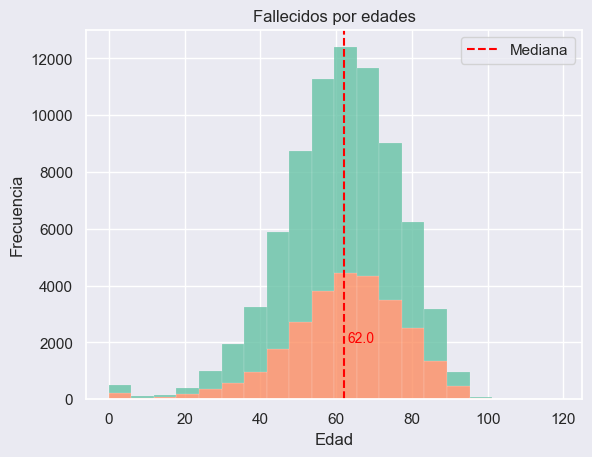

In [44]:
# hacemos un gráfico de barras para ver la cantidad de fallecidos por sexo y mostramos la mediana de ambos grupos

bar = sns.histplot(data=df_covid[df_covid['fallecidos'] == 1], x='AGE', hue="SEX", palette="Set2",  multiple="stack", alpha=.8, edgecolor="w", linewidth=0.1, bins=20)
 

bar.set(xlabel='Edad', ylabel='Frecuencia', title='Fallecidos por edades')
bar.legend(['Mujeres', 'Hombres'])

#mostramos la mediana

plt.axvline(df_covid[df_covid['fallecidos'] == 1]['AGE'].median(), color='red', linestyle='--', linewidth=1.5, label='Mediana')
plt.text(df_covid[df_covid['fallecidos'] == 1]['AGE'].median() + 1, 2000, df_covid[df_covid['fallecidos'] == 1]['AGE'].median(), color='red', fontsize=10) 
plt.legend()

plt.show()



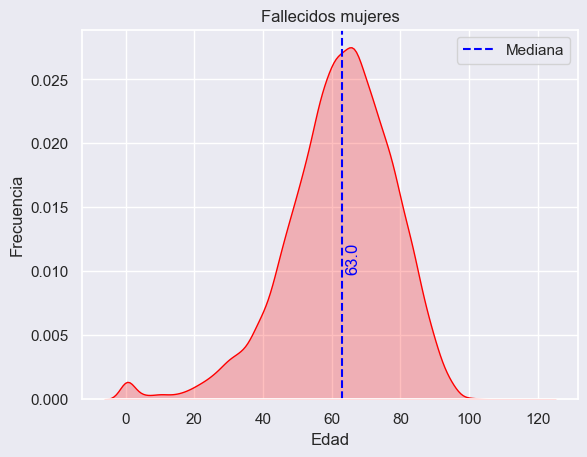

In [45]:
# grafico de distribucion de fallecidos mujeres y marcamo la mediana mostrando su valor pero no mostrandos el histograma
sns.set(rc={'axes.facecolor':'#EAEAF2', 'figure.facecolor':'#EAEAF2'})
mujeres = df_covid[df_covid['SEX'] == 1]

mujeres = mujeres[mujeres['fallecidos'] == 1]

mujeres['AGE'].median()

bar = sns.kdeplot(data=mujeres, x='AGE', fill=True, color='red')
bar.set(xlabel='Edad', ylabel='Frecuencia', title='Fallecidos mujeres')

plt.axvline(mujeres['AGE'].median(), color='blue', linestyle='--', label='Mediana')
plt.text(mujeres['AGE'].median() + 1, 0.01, mujeres['AGE'].median(), rotation=90, color='blue')
plt.legend()




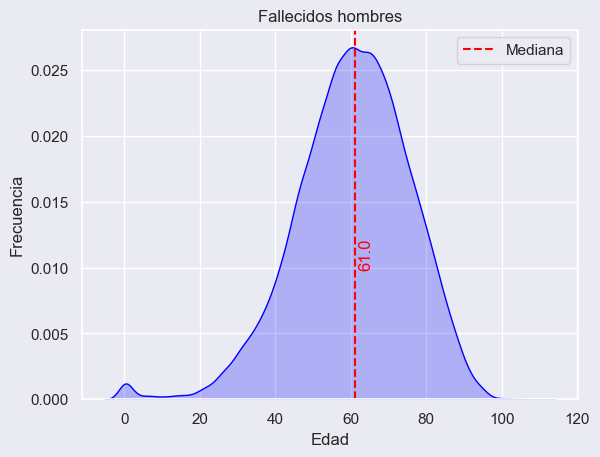

In [46]:
# grafico de distribucion de fallecidos hombres y marcamo la mediana mostrando su valor
sns.set(rc={'axes.facecolor':'#EAEAF2', 'figure.facecolor':'#EAEAF2'})
hombres = df_covid[df_covid['SEX'] == 0]

hombres = hombres[hombres['fallecidos'] == 1]

hombres['AGE'].median()

bar = sns.kdeplot(data=hombres, x='AGE', fill=True, color='blue')

bar.set(xlabel='Edad', ylabel='Frecuencia', title='Fallecidos hombres')

plt.axvline(hombres['AGE'].median(), color='red', linestyle='--', label='Mediana')
plt.text(hombres['AGE'].median() + 1, 0.01, hombres['AGE'].median(), rotation=90, color='red')

plt.legend()



### fallecidos por edad y enfermedades cardiovasculares

Analisamos los fallecidos por edad y con enfermedades cardiovasculares. Se puede observar que la mayoria de los fallecidos son mayores de 60 años y tienen enfermedades cardiovasculares.

In [47]:
# cantidad de pacientes con enfermedades cardiovasculares

df_covid['CARDIOVASCULAR'].value_counts()


CARDIOVASCULAR
0.0    1024730
1.0      20769
Name: count, dtype: int64

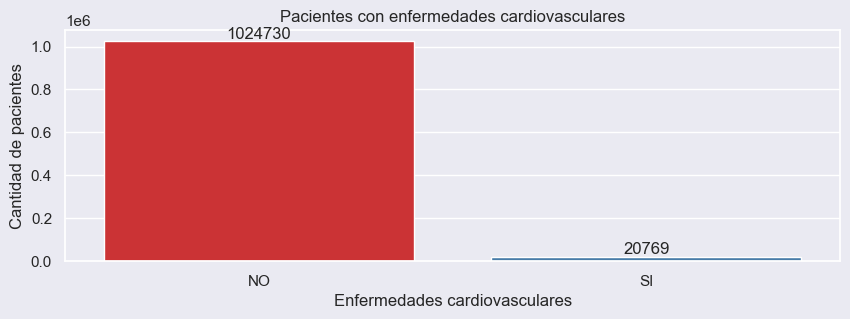

In [48]:
#grafico de barras de pacientes con enfermedades cardiovasculares
sns.set(rc={'axes.facecolor':'#EAEAF2', 'figure.facecolor':'#EAEAF2'})
# tamaño de la figura

plt.figure(figsize=(10, 3))

bar = sns.countplot(x='CARDIOVASCULAR', data=df_covid, palette='Set1')

bar.set_xticklabels(['NO', 'SI'])

bar.set_title('Pacientes con enfermedades cardiovasculares')

bar.set_xlabel('Enfermedades cardiovasculares')

bar.set_ylabel('Cantidad de pacientes')

# agregamos valores a las columnas

for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# tamaño de la figura



plt.show()

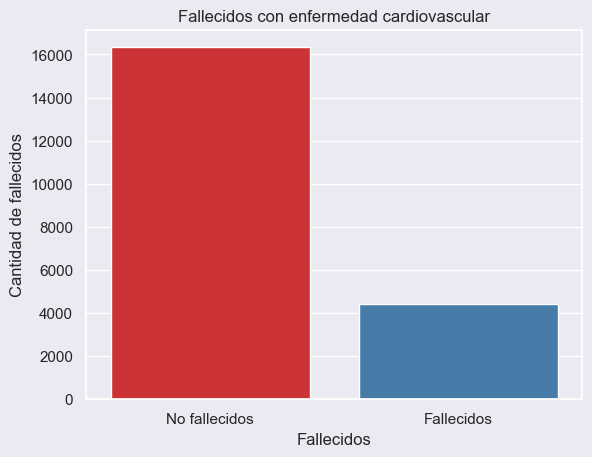

In [49]:
# grafico sobre el total de pacientes con enfermedad cardiovascular y si fallecieron o no
sns.set(rc={'axes.facecolor':'#EAEAF2', 'figure.facecolor':'#EAEAF2'})
cardio = df_covid[df_covid['CARDIOVASCULAR'] == 1]


bar = sns.countplot(x='fallecidos', data=cardio, palette='Set1')
bar.set_xticklabels(['No fallecidos', 'Fallecidos'])
bar.set_title('Fallecidos con enfermedad cardiovascular')
bar.set_xlabel('Fallecidos')
bar.set_ylabel('Cantidad de fallecidos')

plt.show()




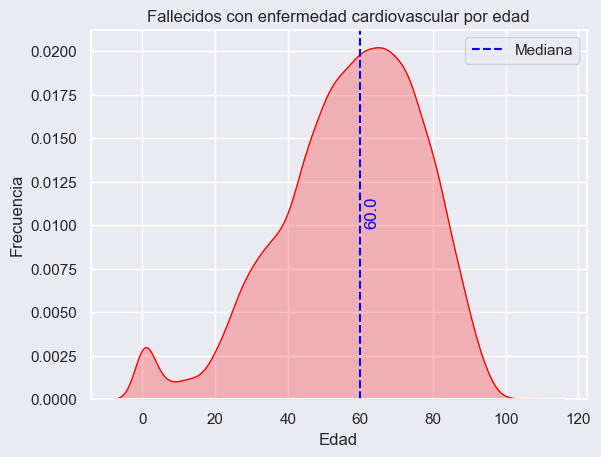

In [50]:
# grafico de distribucion por edad de los fallecidos con enfermedad cardiovascular y marca de la mediana
sns.set(rc={'axes.facecolor':'#EAEAF2', 'figure.facecolor':'#EAEAF2'})
bar = sns.kdeplot(data=cardio, x='AGE', fill=True, color='red')

bar.set(xlabel='Edad', ylabel='Frecuencia', title='Fallecidos con enfermedad cardiovascular por edad')

plt.axvline(cardio['AGE'].median(), color='blue', linestyle='--', label='Mediana')
plt.text(cardio['AGE'].median() + 1, 0.01, cardio['AGE'].median(), rotation=90, color='blue')

plt.legend()

plt.show()



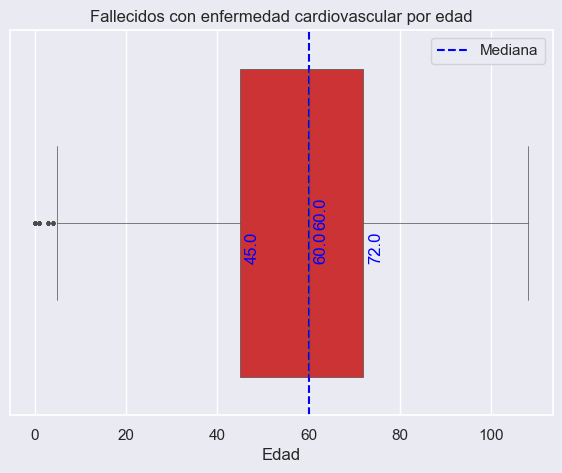

In [51]:
# boxplot de los fallecidos con enfermedad cardiovascular y su edad mostramos la mediana y mostramos la cantidad de pacientes dentro del rango de la caja
plt.figure(figsize=(7, 5))
sns.set(rc={'axes.facecolor':'#EAEAF2', 'figure.facecolor':'#EAEAF2'})
bar = sns.boxplot(data=cardio, x='AGE', color='red', orient='h',  linewidth=0.5, fliersize=2, whis=1.5, palette='Set1')

bar.set(xlabel='Edad', title='Fallecidos con enfermedad cardiovascular por edad')

# mostramos los valores de los quartiles

q1 = cardio['AGE'].quantile(0.25)
q2 = cardio['AGE'].quantile(0.5)
q3 = cardio['AGE'].quantile(0.75)

plt.text(q1 + 1, 0.1, q1, rotation=90, color='blue')

plt.text(q2 + 1, 0.1, q2, rotation=90, color='blue')

plt.text(q3 + 1, 0.1, q3, rotation=90, color='blue')



plt.axvline(cardio['AGE'].median(), color='blue', linestyle='--', label='Mediana')
plt.text(cardio['AGE'].median() + 1, 0.01, cardio['AGE'].median(), rotation=90, color='blue')

plt.legend()

plt.show()





C:\Users\ismael\AppData\Local\Temp\ipykernel_36724\2499444867.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio['fallecidos'] = cardio['fallecidos'].replace({1: 'Si', 0: 'No'})


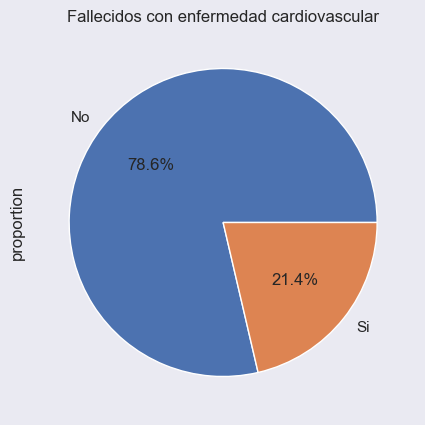

In [52]:
# grafico de torta de los fallecidos con enfermedad cardiovascular en porcentajes

sns.set(rc={'axes.facecolor':'#EAEAF2', 'figure.facecolor':'#EAEAF2'})

# pasamos los valores a si y no para poder graficar 

cardio['fallecidos'] = cardio['fallecidos'].replace({1: 'Si', 0: 'No'})

cardio['fallecidos'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', figsize=(10, 5), title='Fallecidos con enfermedad cardiovascular')

# mostramos los valores en numericos

plt.show()


#### Del total con enfermedades cardiovasculares, sobrevivientes y fallecidos

Tomamos una enfermedad preexistente para empezar a comprender la incidencia de las mismas en el desarrollo de la enfermedad.

Comparamos el total de pacientes con enfermedades cardiovasculares y sin enfermedadades cardiovasculares. Se puede observar un porcentaje mayor de fallecidos en los pacientes con enfermedades cardiovasculares.

In [53]:
total_cardio = df_covid[df_covid['CARDIOVASCULAR'] == 1]    
print(total_cardio['CARDIOVASCULAR'].sum())
sin_cardio = df_covid[df_covid['CARDIOVASCULAR'] == 0]

20769.0


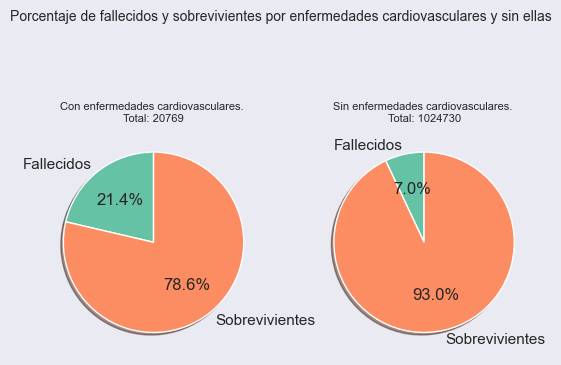

In [54]:
fallecidos_cardio = df_covid[(df_covid['CARDIOVASCULAR'] == 1) & (df_covid['fallecidos'] == 1)]
sobrevivientes_cardio = df_covid[(df_covid['CARDIOVASCULAR'] == 1) & (df_covid['fallecidos'] == 0)]
fallecidos_sin_cardio = df_covid[(df_covid['CARDIOVASCULAR'] == 0) & (df_covid['fallecidos'] == 1)]
sobrevivientes_sin_cardio = df_covid[(df_covid['CARDIOVASCULAR'] == 0) & (df_covid['fallecidos'] == 0)]
fig, ax = plt.subplots( ncols=2, nrows=1)
colores = sns.color_palette('Set2')
sns.set(rc={'axes.facecolor':'#EAEAF2', 'figure.facecolor':'#EAEAF2'})
ax[0].pie([len(fallecidos_cardio), len(sobrevivientes_cardio)], labels=['Fallecidos', 'Sobrevivientes'], autopct='%1.1f%%', shadow=True, startangle=90, colors=colores)
ax[0].set_title('Con enfermedades cardiovasculares. \nTotal: ' + str(len(total_cardio)), fontsize=8)


ax[1].pie([len(fallecidos_sin_cardio), len(sobrevivientes_sin_cardio)], labels=['Fallecidos', 'Sobrevivientes'], autopct='%1.1f%%', shadow=True, startangle=90, colors=colores)
ax[1].set_title('Sin enfermedades cardiovasculares. \nTotal: ' + str(len(sin_cardio)), fontsize=8)

plt.suptitle('Porcentaje de fallecidos y sobrevivientes por enfermedades cardiovasculares y sin ellas', fontsize=10)
plt.show()



## Contexto Comercial

Los estados son la primer gran barrera de proteccion y cuidado ante la pandemia. Pero como todo su capacidad de respuesta depende mucho del conocmientos de la enfermedad. Los recursos con los que cuentan son finitos y cuando mas eficiente sea su uso mas vidas se salvaran y mas rapido se lograra el control de la enfermedad. 
Los estados fueron tambien los encargados de la recollecion de los datos y su publicacion. 
El presente trabajo permitira tener una mejor comprension de la enfermedad y permitir a los estados mejorar su capacidad de respuesta y adecuarse a ella. 

### neumonia

In [55]:
# cantidad pacientes con neumonia

neumonia = df_covid[df_covid['PNEUMONIA'] == 1]

print(neumonia['PNEUMONIA'].sum())



140038.0


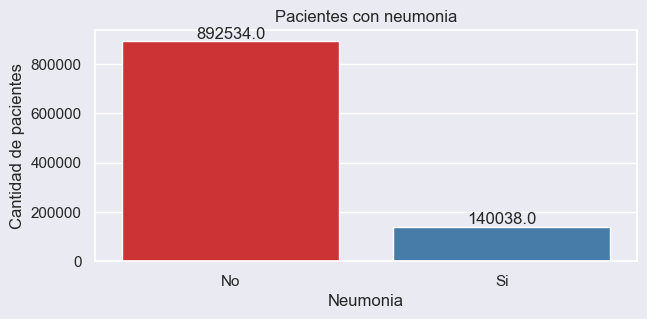

In [56]:
#graficamos pacientes con neumonia sobre el total de pacientes
sns.set(rc={'axes.facecolor':'#EAEAF2', 'figure.facecolor':'#EAEAF2'})
# tamaño grafico

plt.figure(figsize=(7, 3))

bar = sns.countplot(x='PNEUMONIA', data=df_covid, palette='Set1')

#nombre de los ejes y titulo

bar.set_title('Pacientes con neumonia')

bar.set_xlabel('Neumonia')

bar.set_ylabel('Cantidad de pacientes')

#cambiamos los valores de los ejes

bar.set_xticklabels(['No', 'Si'])

# agregamos los valores a las columnas

for p in bar.patches:
    
    bar.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

<Figure size 700x300 with 0 Axes>

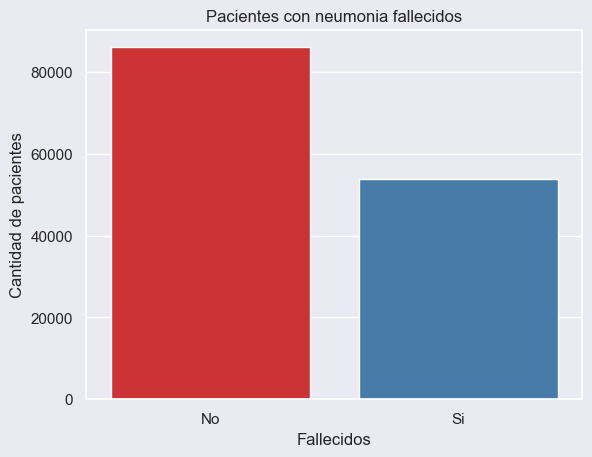

<Figure size 700x300 with 0 Axes>

In [57]:
# graficamos los pacientes con neumonia fallecidos
sns.set(rc={'axes.facecolor':'#EAEAF2', 'figure.facecolor':'#EAEAF2'})
neumonia = df_covid[df_covid['PNEUMONIA'] == 1]

bar = sns.countplot(x='fallecidos', data=neumonia, palette='Set1')

bar.set_title('Pacientes con neumonia fallecidos')

bar.set_xlabel('Fallecidos')

bar.set_ylabel('Cantidad de pacientes')

#cambiamos los valores de los ejes


bar.set_xticklabels(['No', 'Si'])



# tamaño grafico

plt.figure(figsize=(7, 3))



Text(68.0, 0.01, '67.0')

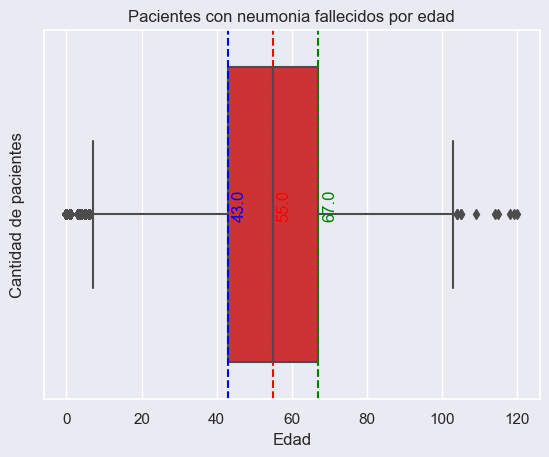

In [58]:
#boxplot de los fallecidos con neumonia por edad mostramos la mediana y mostramos la cantidad de pacientes dentro del rango de la caja
sns.set(rc={'axes.facecolor':'#EAEAF2', 'figure.facecolor':'#EAEAF2'})
bar = sns.boxplot(data=neumonia, x='AGE', palette='Set1')

bar.set_title('Pacientes con neumonia fallecidos por edad')

bar.set_xlabel('Edad')

bar.set_ylabel('Cantidad de pacientes')

# calculamos los cuartiles

q1 = neumonia['AGE'].quantile(0.25)

q2 = neumonia['AGE'].quantile(0.5)

q3 = neumonia['AGE'].quantile(0.75)

# graficamos los cuartiles

plt.axvline(q1, color='blue', linestyle='--', label='Cuartil 1')

plt.text(q1 + 1, 0.01, q1, rotation=90, color='blue')

plt.axvline(q2, color='red', linestyle='--', label='Cuartil 2')

plt.text(q2 + 1, 0.01, q2, rotation=90, color='red')

plt.axvline(q3, color='green', linestyle='--', label='Cuartil 3')

plt.text(q3 + 1, 0.01, q3, rotation=90, color='green')





140038.0


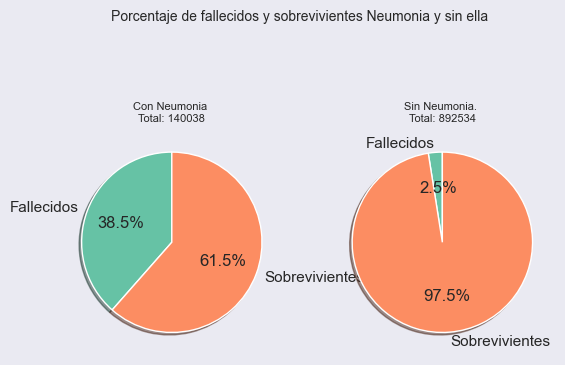

In [59]:
total_neumo = df_covid[df_covid['PNEUMONIA'] == 1]    
print(total_neumo['PNEUMONIA'].sum())
sin_neumo = df_covid[df_covid['PNEUMONIA'] == 0]
sns.set(rc={'axes.facecolor':'#EAEAF2', 'figure.facecolor':'#EAEAF2'})

fallecidos_neumo = df_covid[(df_covid['PNEUMONIA'] == 1) & (df_covid['fallecidos'] == 1)]
sobrevivientes_neumo = df_covid[(df_covid['PNEUMONIA'] == 1) & (df_covid['fallecidos'] == 0)]
fallecidos_sin_neumo = df_covid[(df_covid['PNEUMONIA'] == 0) & (df_covid['fallecidos'] == 1)]
sobrevivientes_sin_neumo = df_covid[(df_covid['PNEUMONIA'] == 0) & (df_covid['fallecidos'] == 0)]
fig, ax = plt.subplots( ncols=2, nrows=1)
colores = sns.color_palette('Set2')

ax[0].pie([len(fallecidos_neumo), len(sobrevivientes_neumo)], labels=['Fallecidos', 'Sobrevivientes'], autopct='%1.1f%%', shadow=True, startangle=90, colors=colores)
ax[0].set_title('Con Neumonia \nTotal: ' + str(len(total_neumo)), fontsize=8)


ax[1].pie([len(fallecidos_sin_neumo), len(sobrevivientes_sin_neumo)], labels=['Fallecidos', 'Sobrevivientes'], autopct='%1.1f%%', shadow=True, startangle=90, colors=colores)
ax[1].set_title('Sin Neumonia. \nTotal: ' + str(len(sin_neumo)), fontsize=8)

plt.suptitle('Porcentaje de fallecidos y sobrevivientes Neumonia y sin ella', fontsize=10)
plt.show()

### tabaquismo

In [60]:
tabaquismo = df_covid[df_covid['TOBACCO'] == 1]

print(tabaquismo['TOBACCO'].sum())

84376.0


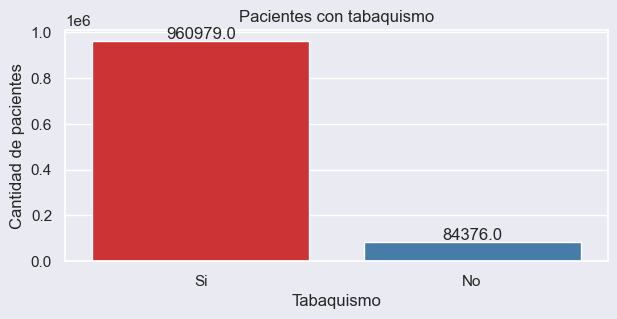

In [61]:
#graficamos pacientes con tabaquismo sobre el total de pacientes
sns.set(rc={'axes.facecolor':'#EAEAF2', 'figure.facecolor':'#EAEAF2'})
# tamaño grafico

plt.figure(figsize=(7, 3))

bar = sns.countplot(x='TOBACCO', data=df_covid, palette='Set1')

#nombre de los ejes y titulo

bar.set_title('Pacientes con tabaquismo')

bar.set_xlabel('Tabaquismo')

bar.set_ylabel('Cantidad de pacientes')

#cambiamos los valores de los ejes

bar.set_xticklabels(['Si', 'No'])

# agregamos los valores a las columnas

for p in bar.patches:
    
    bar.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

<Figure size 700x300 with 0 Axes>

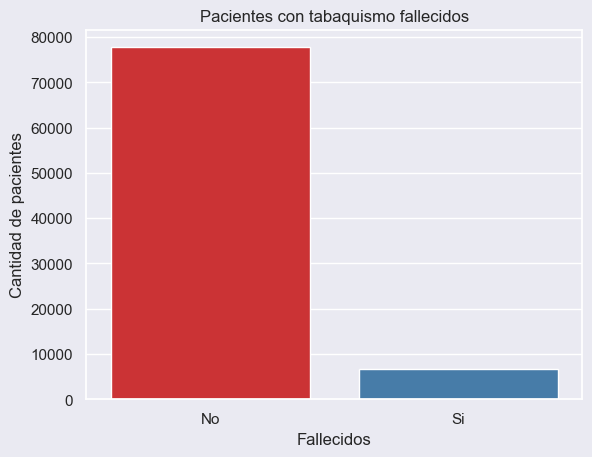

<Figure size 700x300 with 0 Axes>

In [62]:
# graficamos los pacientes con tabaquismo fallecidos
sns.set(rc={'axes.facecolor':'#EAEAF2', 'figure.facecolor':'#EAEAF2'})
tabaco = df_covid[df_covid['TOBACCO'] == 1]

bar = sns.countplot(x='fallecidos', data=tabaco, palette='Set1')

bar.set_title('Pacientes con tabaquismo fallecidos')

bar.set_xlabel('Fallecidos')

bar.set_ylabel('Cantidad de pacientes')

#cambiamos los valores de los ejes


bar.set_xticklabels(['No', 'Si'])



# tamaño grafico

plt.figure(figsize=(7, 3))

Text(53.0, 0.01, '52.0')

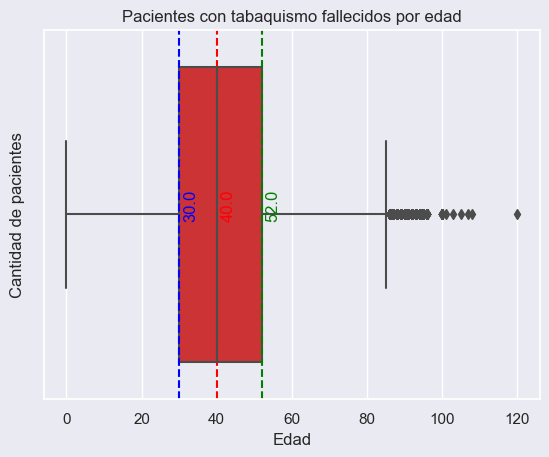

In [63]:
#boxplot de los fallecidos con tabaquismo por edad mostramos la mediana y mostramos la cantidad de pacientes dentro del rango de la caja
sns.set(rc={'axes.facecolor':'#EAEAF2', 'figure.facecolor':'#EAEAF2'})
bar = sns.boxplot(data=tabaco, x='AGE', palette='Set1')

bar.set_title('Pacientes con tabaquismo fallecidos por edad')

bar.set_xlabel('Edad')

bar.set_ylabel('Cantidad de pacientes')

# calculamos los cuartiles

q1 = tabaco['AGE'].quantile(0.25)

q2 = tabaco['AGE'].quantile(0.5)

q3 = tabaco['AGE'].quantile(0.75)

# graficamos los cuartiles

plt.axvline(q1, color='blue', linestyle='--', label='Cuartil 1')

plt.text(q1 + 1, 0.01, q1, rotation=90, color='blue')

plt.axvline(q2, color='red', linestyle='--', label='Cuartil 2')

plt.text(q2 + 1, 0.01, q2, rotation=90, color='red')

plt.axvline(q3, color='green', linestyle='--', label='Cuartil 3')

plt.text(q3 + 1, 0.01, q3, rotation=90, color='green')

84376.0


Text(0.5, 0.98, 'Porcentaje de fallecidos y sobrevivientes con Tabaquismo y sin el')

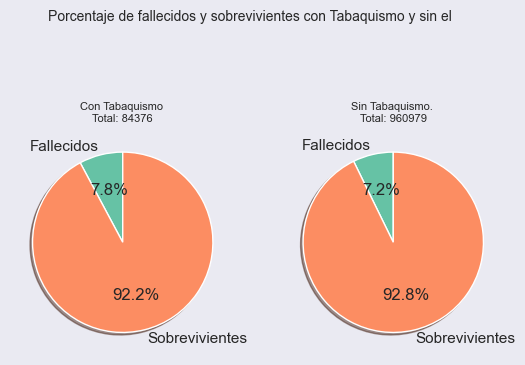

In [64]:
total_tabaco = df_covid[df_covid['TOBACCO'] == 1]    
print(total_tabaco['TOBACCO'].sum())
sin_tabaco = df_covid[df_covid['TOBACCO'] == 0]
sns.set(rc={'axes.facecolor':'#EAEAF2', 'figure.facecolor':'#EAEAF2'})

fallecidos_tabaco = df_covid[(df_covid['TOBACCO'] == 1) & (df_covid['fallecidos'] == 1)]
sobrevivientes_tabaco = df_covid[(df_covid['TOBACCO'] == 1) & (df_covid['fallecidos'] == 0)]
fallecidos_sin_tabaco = df_covid[(df_covid['TOBACCO'] == 0) & (df_covid['fallecidos'] == 1)]
sobrevivientes_sin_tabaco = df_covid[(df_covid['TOBACCO'] == 0) & (df_covid['fallecidos'] == 0)]
fig, ax = plt.subplots( ncols=2, nrows=1)
colores = sns.color_palette('Set2')

ax[0].pie([len(fallecidos_tabaco), len(sobrevivientes_tabaco)], labels=['Fallecidos', 'Sobrevivientes'], autopct='%1.1f%%', shadow=True, startangle=90, colors=colores)
ax[0].set_title('Con Tabaquismo \nTotal: ' + str(len(total_tabaco)), fontsize=8)


ax[1].pie([len(fallecidos_sin_tabaco), len(sobrevivientes_sin_tabaco)], labels=['Fallecidos', 'Sobrevivientes'], autopct='%1.1f%%', shadow=True, startangle=90, colors=colores)
ax[1].set_title('Sin Tabaquismo. \nTotal: ' + str(len(sin_tabaco)), fontsize=8)

plt.suptitle('Porcentaje de fallecidos y sobrevivientes con Tabaquismo y sin el', fontsize=10)

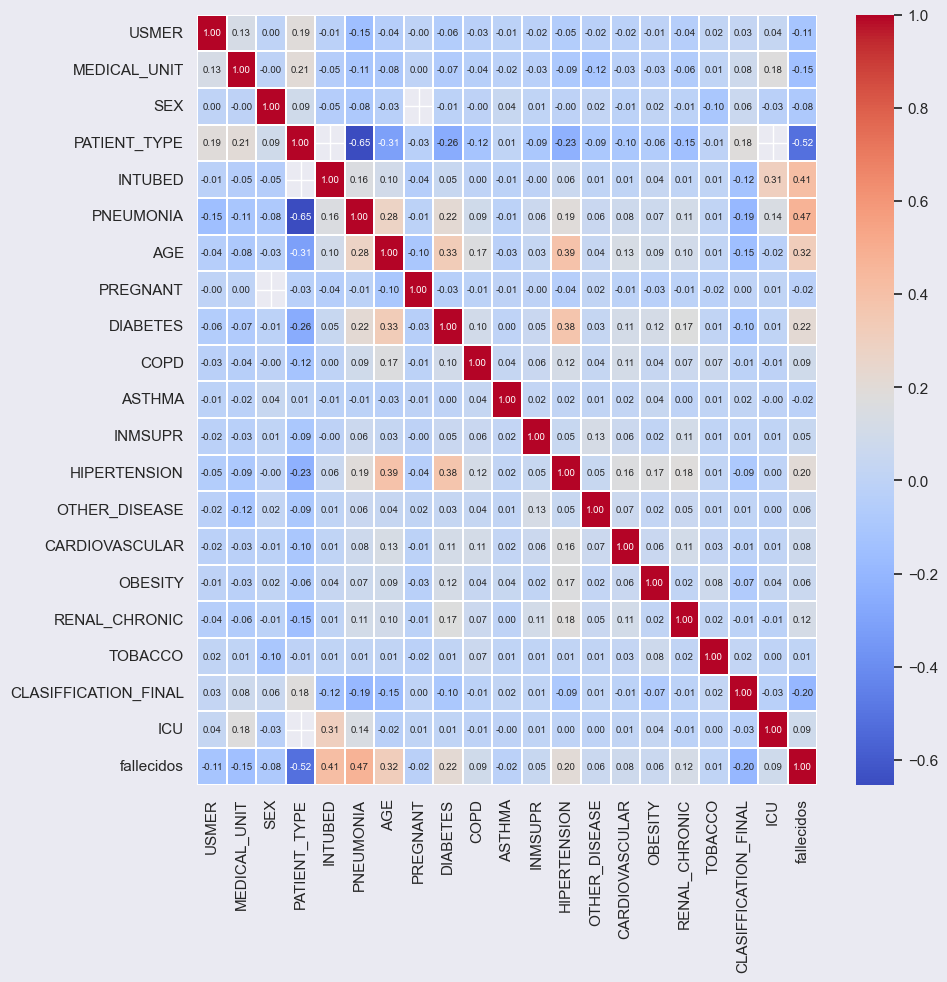

In [65]:
# hacemos un mapa de calor sin date_died

df_covid = df_covid.drop(['DATE_DIED'], axis=1)
df_covid = df_covid.drop(['mes_nombre'], axis=1)
df_covid = df_covid.drop(['mes'], axis=1)

sns.set(rc={'axes.facecolor':'#EAEAF2', 'figure.facecolor':'#EAEAF2'})

plt.figure(figsize=(10, 10))

sns.heatmap(df_covid.corr(), annot=True, cmap='coolwarm', linewidths=0.2, annot_kws={'size':7}, fmt='.2f')
# solo la mitad del mapa de calor

mask = np.triu(np.ones_like(df_covid.corr(), dtype=bool))

plt.savefig('mapa_calor.png', dpi=300, bbox_inches='tight')

plt.show()

